# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Import Libraries</p></div>


In [1]:
%%capture
%pip install matplotlib Pillow

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

plt.rcParams['figure.figsize'] = (12,6)
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Define the Directory Path</p></div>


In [3]:
import os

# Define the main directory path
main_directory = '/kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust'

# Create dictionaries to store paths and labels
data = {'train': [], 'val': [], 'test': []}

# Iterate through train, val, and test directories
for split in ['train', 'val', 'test']:
    for category in ['control', 'diseased']:
        category_path = os.path.join(main_directory, split, category)
        file_list = os.listdir(category_path)
        for filename in file_list:
            if filename.endswith('.jpg'):
                label_name = category
                file_path = os.path.join(category_path, filename)
                data[split].append((file_path, label_name))

# Print the collected data for each split
for split, file_paths_labels in data.items():
    print(f"{split.capitalize()} Data:")
    for file_path, label_name in file_paths_labels:
        print(f"Path: {file_path}, Label: {label_name}")
    print()


Train Data:
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/208.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/333.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/45.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/56.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/89.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/20.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust/train/control/275.jpg, Label: control
Path: /kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4y

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Display Images</p></div>


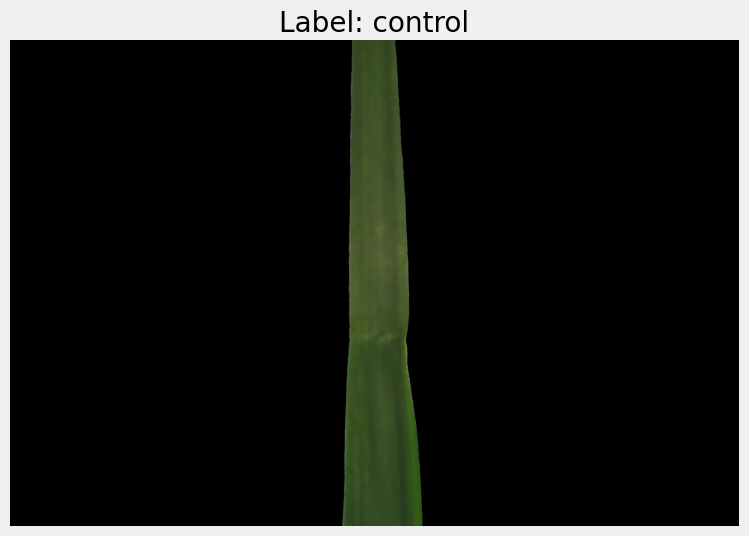

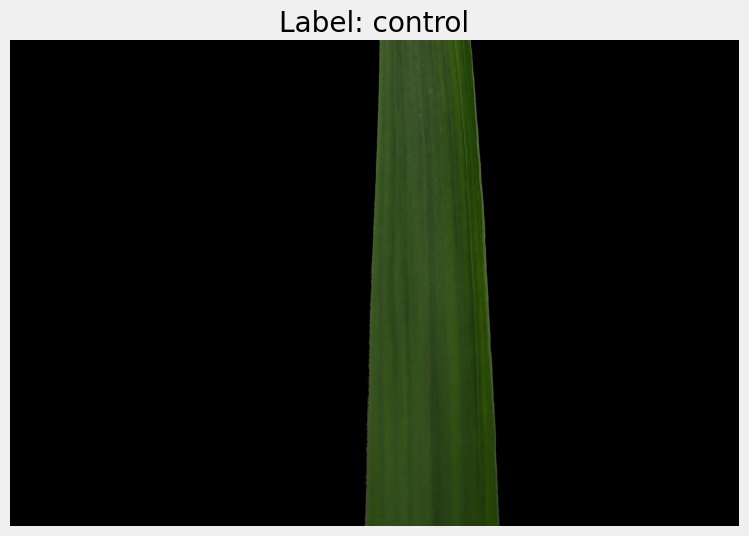

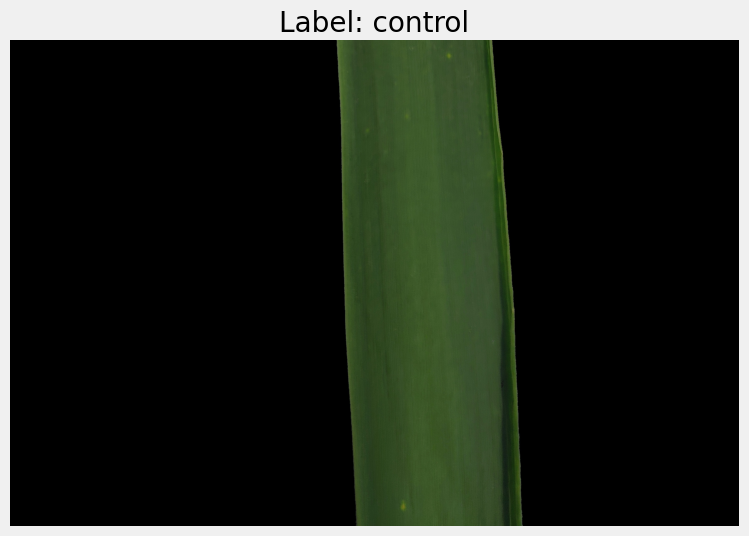

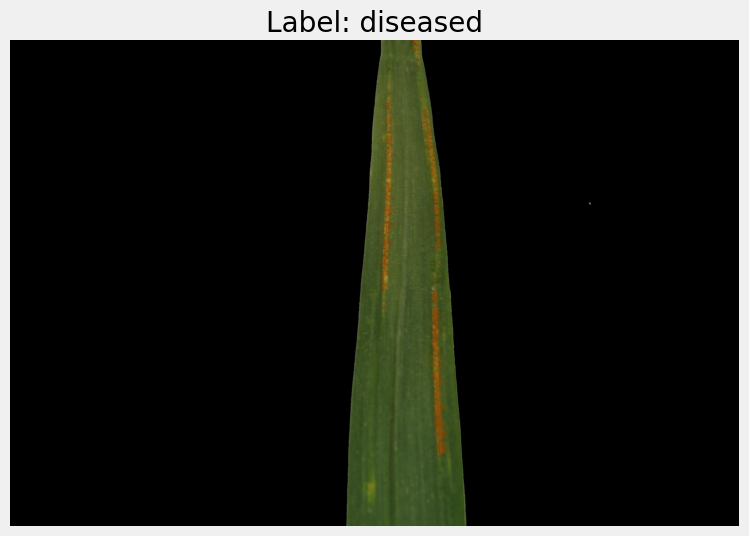

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the main directory path
main_directory = '/kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust'

# Create dictionaries to store paths and labels
data = {'train': [], 'val': [], 'test': []}

# Number of images to display per split
images_to_display = 3

# Counter to track displayed images
displayed_images = 0

# Iterate through train, val, and test directories
for split in ['train', 'val', 'test']:
    if displayed_images >= images_to_display:
        break
    
    for category in ['control', 'diseased']:
        category_path = os.path.join(main_directory, split, category)
        file_list = os.listdir(category_path)
        for filename in file_list:
            if filename.endswith('.jpg'):
                label_name = category
                file_path = os.path.join(category_path, filename)
                data[split].append((file_path, label_name))
                
                # Display the image
                img = Image.open(file_path)
                plt.imshow(img)
                plt.title(f"Label: {label_name}")
                plt.axis('off')
                plt.show()
                
                displayed_images += 1
                if displayed_images >= images_to_display:
                    break
    
    if displayed_images >= images_to_display:
        break


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Data Generators for Train, Val, and Test Sets</p></div>


In [5]:
# Define the main directory path
main_directory = '/kaggle/input/wheat-nitrogen-deficiency-and-leaf-rust-image/th422bg4yd-1/WheatLeafRust'

# Define image dimensions and other parameters
image_size = (128, 128)
batch_size = 32

# Create data generators for train, val, and test sets
data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
train_generator = data_gen.flow_from_directory(
    main_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)
val_generator = data_gen.flow_from_directory(
    main_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 731 images belonging to 3 classes.
Found 128 images belonging to 3 classes.


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Build a CNN Model</p></div>

In [6]:
# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Train the Model</p></div>

In [7]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=10
)

Epoch 1/10
22/22 [==============================] - 37s 2s/step - loss: 0.0424 - accuracy: 0.6967 - val_loss: 0.1576 - val_accuracy: 0.7031
Epoch 2/10
22/22 [==============================] - 30s 1s/step - loss: 2.6574 - accuracy: 0.6996 - val_loss: 3.9544 - val_accuracy: 0.7031
Epoch 3/10
22/22 [==============================] - 31s 1s/step - loss: -9.8585 - accuracy: 0.7010 - val_loss: 4.8657 - val_accuracy: 0.7031
Epoch 4/10
22/22 [==============================] - 30s 1s/step - loss: -23.1647 - accuracy: 0.6967 - val_loss: 18.6809 - val_accuracy: 0.7031
Epoch 5/10
22/22 [==============================] - 30s 1s/step - loss: -226.8515 - accuracy: 0.7024 - val_loss: 29.1741 - val_accuracy: 0.6953
Epoch 6/10
22/22 [==============================] - 31s 1s/step - loss: -1225.6989 - accuracy: 0.6938 - val_loss: 246.3530 - val_accuracy: 0.7031
Epoch 7/10
22/22 [==============================] - 30s 1s/step - loss: -5497.1616 - accuracy: 0.6981 - val_loss: 247.0300 - val_accuracy: 0.6719


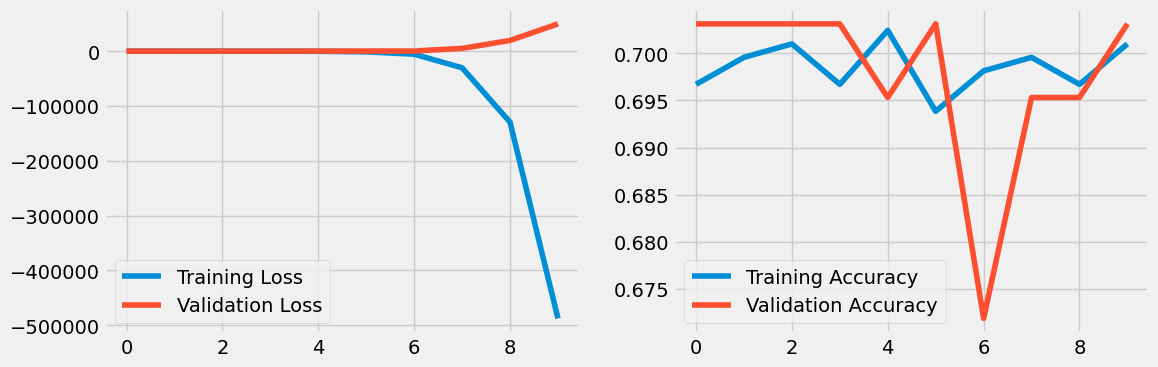

In [8]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# <div style="color:white;display:inline-block;border-radius:5px;background-color:#0000FF;font-family:Nexa;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:90%;letter-spacing:0.5px;margin:0"><b></b>Evaluate the Model Test Set</p></div>

In [9]:
# Evaluate the model on the test set
test_generator = data_gen.flow_from_directory(
    main_directory,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 128 images belonging to 3 classes.
4/4 [==============================] - 4s 955ms/step - loss: 49798.5781 - accuracy: 0.7031
Test Loss: 49798.5781
Test Accuracy: 0.7031
